<a href="https://colab.research.google.com/github/oliviamaryjames/portfolio/blob/main/spam_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORT PACKAGES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORT DATA
df = pd.read_csv("spam.csv")

In [3]:
#inspect data
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
#TURNING SPAM/HAM INTO A NUMERICAL DATA, CREATING A NEW COLUMN CALLED SPAM
df['spam'] = df['Category'].apply(lambda x: 1 if x =='spam' else 0)

In [ ]:
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
#CREATE TRAIN/TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(df.Message, df.spam)

In [ ]:
x_train

1289                             Happy new year to u too!
298     Hurt me... Tease me... Make me cry... But in t...
1017    FREE for 1st week! No1 Nokia tone 4 ur mob eve...
4767                               Whens your radio show?
4783                     Call me, i am senthil from hsbc.
                              ...                        
4975    Aiyo u so poor thing... Then u dun wan 2 eat? ...
4357       Great. So should i send you my account number.
2065    Pass dis to all ur contacts n see wat u get! R...
2845    Today iZ Yellow rose day. If u love my frndshi...
3409    Do you want a New Nokia 3510i colour phone Del...
Name: Message, Length: 4179, dtype: object

In [ ]:
y_train

1289    0
298     0
1017    1
4767    0
4783    0
       ..
4975    0
4357    0
2065    0
2845    0
3409    1
Name: spam, Length: 4179, dtype: int64

In [ ]:
#FIND THE WORD COUNT AND STORE DATA AS A MATRIX
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [ ]:
x_train_count

<4179x7479 sparse matrix of type '<class 'numpy.int64'>'
	with 55758 stored elements in Compressed Sparse Row format>

In [ ]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#TRAIN MODEL
model = MultinomialNB()
model.fit(x_train_count, y_train)

MultinomialNB()

In [ ]:
#PRE-TEST HAM
email_ham = ["Good afternoon, we have another session in a few minutes"]
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)

array([0])

In [ ]:
#PRE-TEST SPAM
email_spam = ["Earn up to $10,000 per week"]
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

array([1])

In [ ]:
#test model
x_test_count = cv.transform(x_test)
model.score(x_test_count, y_test)

0.9863603732950467

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test,model.predict(x_test_count),target_names = ['Not Spam','Spam'])
print(report)

              precision    recall  f1-score   support

    Not Spam       0.99      0.99      0.99      1189
        Spam       0.97      0.94      0.95       204

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [ ]:
y_pred = model.predict(x_test_count)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9863603732950467


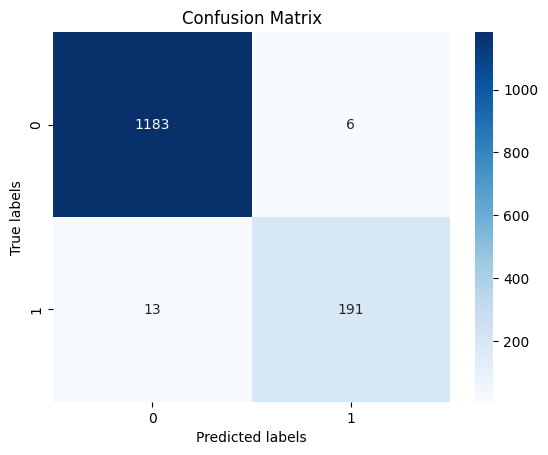

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap = "Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

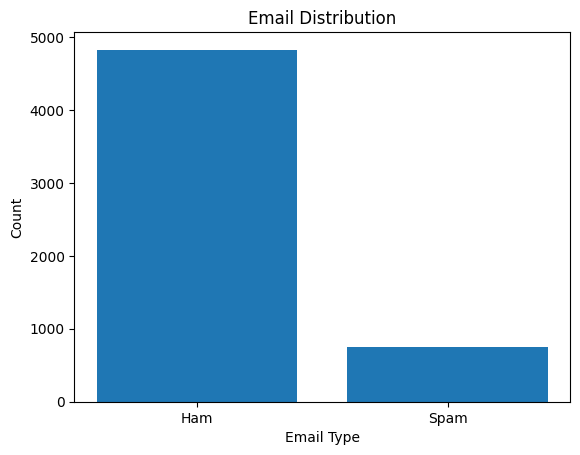

In [ ]:
email_ham_count = 4825
email_spam_count = 747
labels= ['Ham','Spam']
counts = [email_ham_count, email_spam_count]
plt.bar(labels, counts)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Email Distribution')
plt.show()